# Exploratory Data Analysis
### Purpose
The purpose of this notebook is to explore the Audubon circle and NOAA data.
This notebook addresses some one of the tasks in Github issue #36

### Author: 
Ian Davis
### Date: 
2020-02-17
### Update Date: 
2020-05-13

### Inputs 
1.3-rec-connecting-fips-ecosystem-data.csv - Comma separate file of the Christmas Bird Count and matches to 1 or more NOAA weather stations.
- Data Dictonary can be found here: http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf

### Output Files
None

## Steps or Proceedures in the notebook 
- Set runtime options
- Import data and do initial counts
- Screen the data
- Check for Outliers
- Summary statistics and simple visualizations

## References
- elevation change and temperature: https://sciencing.com/info-8686864-latitude-altitude-affect-temperature.html

### See data dictionary: 

http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf

In [6]:
import numpy as np
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import sys

# add scripts folder to path
sys.path.insert(1, '../scripts')

# user import
from calcs import main_calcs

pd.set_option('display.max_columns', 500)

## Set File Paths and Runtime Options

In [7]:
#PATH_TO_PAIRED_DATA = '../data/Cloud_data/1.2-ijd-fetch-circle-elevations_20200502155633.csv'
PATH_TO_PAIRED_DATA = '../data/Cloud_data/1.3-rec-connecting-fips-ecosystem-data.txt'

## Read in Data

In [11]:
# Read in unfinished dataset
df_paired = pd.read_csv(PATH_TO_PAIRED_DATA, compression='gzip', sep = "\t")

/Users/rcdebaca/.pyenv/versions/funhacks371/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (62,64,65,71,73,75,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df_paired.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,field_hours,feeder_hours,nocturnal_hours,field_distance,nocturnal_distance,distance_units,min_temp,max_temp,temp_unit,min_wind,max_wind,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric,min_wind_metric,max_wind_metric,min_wind_imperial,max_wind_imperial,ui,geohash_circle,circle_id,id,latitude,longitude,elevation,state,name,gsn_flag,hcn_crn_flag,wmoid,geohash_station,temp_min_value,temp_max_value,precipitation_value,temp_avg,snow,snwd,am_rain,pm_rain,am_snow,pm_snow,circle_elev,elevation_source,block_fips,county_fips,Ecosys_circle,Usgsid_sys_circle,Nlcd_code_circle,Nlcd_circle,Ecosys_station,Usgsid_sys_station,Nlcd_code_station,Nlcd_station
0,Hawai'i: Volcano N.P.,US-HI,19.4333,-155.2833,1955,1955-01-01,11.0,NaN,NaN,NaN,23.0,NaN,NaN,45.0,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,72.417123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.4333-155.2833_1955,8e3w,8e3wd3w,USC00511303,19.4297,-155.2561,1210.40,HI,HAWAII VOL NP HQ 54,,,NaN,8e3w,100.0,161.0,180.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1228.18,ghcn_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hawai'i: Volcano N.P.,US-HI,19.4333,-155.2833,1956,1955-12-31,11.0,NaN,NaN,NaN,32.0,NaN,NaN,104.0,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,167.364017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.4333-155.2833_1956,8e3w,8e3wd3w,USC00511303,19.4297,-155.2561,1210.40,HI,HAWAII VOL NP HQ 54,,,NaN,8e3w,117.0,189.0,290.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1228.18,ghcn_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hawai'i: Volcano N.P.,US-HI,19.4333,-155.2833,1968,1967-12-30,2.0,NaN,NaN,NaN,14.0,NaN,NaN,62.0,NaN,Miles,54.0,66.0,NaN,3.0,6.0,NaN,0.0,0.0,NaN,2.0,2.0,62.0,99.774702,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,12.222222,18.888889,4.827808,9.655616,1.8642,3.7284,19.4333-155.2833_1968,8e3w,8e3wd3w,US1HIHI0013,19.4391,-155.2156,1059.20,HI,VOLCANO 4.3 SSE,,,NaN,8e3w,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,3,1228.18,ghcn_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hawai'i: Volcano N.P.,US-HI,19.4333,-155.2833,1968,1967-12-30,2.0,NaN,NaN,NaN,14.0,NaN,NaN,62.0,NaN,Miles,54.0,66.0,NaN,3.0,6.0,NaN,0.0,0.0,NaN,2.0,2.0,62.0,99.774702,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,12.222222,18.888889,4.827808,9.655616,1.8642,3.7284,19.4333-155.2833_1968,8e3w,8e3wd3w,US1HIHI0071,19.4414,-155.2487,1194.80,HI,VOLCANO 4.0 S,,,NaN,8e3w,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,3,1228.18,ghcn_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hawai'i: Volcano N.P.,US-HI,19.4333,-155.2833,1968,1967-12-30,2.0,NaN,NaN,NaN,14.0,NaN,NaN,62.0,NaN,Miles,54.0,66.0,NaN,3.0,6.0,NaN,0.0,0.0,NaN,2.0,2.0,62.0,99.774702,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,12.222222,18.888889,4.827808,9.655616,1.8642,3.7284,19.4333-155.2833_1968,8e3w,8e3wd3w,USC00514563,19.4094,-155.2608,1079.87,HI,KILAUEA CAMP,,,NaN,8e3w,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,3,1228.18,usgs_api,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculated Variables

In [14]:
df_paired = main_calcs(df_paired)

## Data Screening

Are there indeces which have negative values for both CBC and NOAA?

In [15]:
df_paired.loc[((df_paired.loc[:, 'min_temp'] < 0.0) & 
               (df_paired.loc[:, 'noaa_tmin_value'] < 0.0))].index.size

2256

Any negative temperatures in Florida?<br>
Lat: 25 to 30<br>
Long: -80 to -90

In [16]:
df_paired.loc[((df_paired.loc[:, 'noaa_tmin_value'] < 0.0) &
               (df_paired.loc[:, 'latitude'] < 30.0) &
               (df_paired.loc[:, 'longitude'] > -90.0))].index.size

0

Screen stations with obvious temperature errors:<br>
- tmin no less than -100 degF
- tmax no greater than 150 degFa
- (probably could be more strict, but this is first guess)

In [17]:
print('Minimum tmin for circles:', df_paired['min_temp'].min())
print('Minimum tmin for NOAA stations:', df_paired['noaa_tmin_value'].min())
print('Minimum tmax for circles:', df_paired['max_temp'].max())
print('Minimum tmax for NOAA stations:', df_paired['noaa_tmax_value'].max())

Minimum tmin for circles: -52.0
Minimum tmin for NOAA stations: -58.0
Minimum tmax for circles: 93.0
Minimum tmax for NOAA stations: 140.0


Are there any 'min_snow' values larger than 'max_snow' ?

In [18]:
print('Number of rows:', df_paired.loc[(df_paired.loc[:, 'min_snow'] > df_paired.loc[:, 'max_snow'])].index.size)
print(df_paired.loc[(df_paired.loc[:, 'min_snow'] > df_paired.loc[:, 'max_snow']), ['circle_name', 'count_date', 'min_snow', 'max_snow']])

Number of rows: 17
                       circle_name  count_date  min_snow  max_snow
227400       Angel Fire-Eagle Nest  2011-12-18      12.0       3.0
227401       Angel Fire-Eagle Nest  2011-12-18      12.0       3.0
227402       Angel Fire-Eagle Nest  2011-12-18      12.0       3.0
227403       Angel Fire-Eagle Nest  2011-12-18      12.0       3.0
227404       Angel Fire-Eagle Nest  2011-12-18      12.0       3.0
227405       Angel Fire-Eagle Nest  2011-12-18      12.0       3.0
290190  Southern Dorchester County  1962-12-26       3.0       0.0
624049                    Waukesha  2011-12-17       5.0       1.0
624050                    Waukesha  2011-12-17       5.0       1.0
624051                    Waukesha  2011-12-17       5.0       1.0
624052                    Waukesha  2011-12-17       5.0       1.0
723062                Presque Isle  2011-12-31       2.0       1.0
723063                Presque Isle  2011-12-31       2.0       1.0
723064                Presque Isle  2011-12

In [19]:
# Sometimes the rain or snow intensity is listed as "2,1"
# And somewhere along the line these were converted to floats: 32.0 = 3,2 ...probably?
df_paired.loc[:, 'am_rain'].value_counts()

3        328161
4        257505
2         77935
3.0       16179
4.0       12111
1         11067
3.0        8954
4.0        5175
2,1        4995
3,2        4341
3,2,1      1643
2.0        1270
1.0         260
3,1         172
2.0          89
1,2          30
2,3          11
1,4           5
1,2,3         2
3,4           1
Name: am_rain, dtype: int64

Rows that contain precipitation values:

In [20]:
df_paired.loc[(df_paired.loc[:, 'cbc_is_prec'] == True)].index.size

731168

Check for false positives:

In [21]:
df_paired.loc[(df_paired.loc[:, 'cbc_is_prec'] == True) &
              (pd.isna(df_paired.loc[:, 'min_snow']) &
               pd.isna(df_paired.loc[:, 'max_snow']) &
               pd.isna(df_paired.loc[:, 'am_rain']) &
               pd.isna(df_paired.loc[:, 'pm_rain'])),
              ['cbc_is_prec', 'min_snow', 'max_snow', 'am_rain', 'pm_rain']].head(10)

,cbc_is_prec,min_snow,max_snow,am_rain,pm_rain


Absolute Temperature Difference:

In [22]:
print('Largest temp difference for tmax between circles and stations:', df_paired['tmax_diff_abs'].max())
print('Largest temp difference for tmin between circles and stations:', df_paired['tmin_diff_abs'].max())

Largest temp difference for tmax between circles and stations: 92.08
Largest temp difference for tmin between circles and stations: 83.0


<br>
Histogram of tmax absolute difference values:

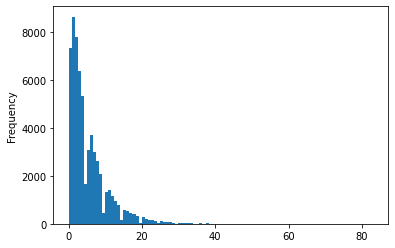

In [23]:
df_paired.loc[:, 'tmin_diff_abs'].plot.hist(bins=100)

Histogram of tmin absolute difference values:

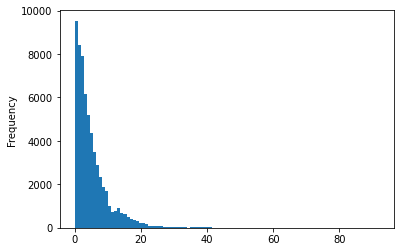

In [24]:
df_paired.loc[:, 'tmax_diff_abs'].plot.hist(bins=100)

Mean temperature difference:

In [25]:
# mean temperature difference
tmin_diff_mean = df_paired.loc[:, 'tmin_diff_abs'].mean(skipna=True)
tmin_diff_std = df_paired.loc[:, 'tmin_diff_abs'].std(skipna=True)
tmax_diff_mean = df_paired.loc[:, 'tmax_diff_abs'].mean(skipna=True)
tmax_diff_std = df_paired.loc[:, 'tmax_diff_abs'].std(skipna=True)

print('Tmin Difference Mean & SD:', round(tmin_diff_mean,2), ', ', round(tmin_diff_std,2))
print('Tmax Difference Mean & SD:', round(tmax_diff_mean,2), ', ', round(tmax_diff_std,2))

Tmin Difference Mean & SD: 5.26 ,  5.51
Tmax Difference Mean & SD: 5.07 ,  5.74


## Outliers



Screen stations further than 10 km:

In [26]:
df_paired_10k = df_paired.loc[(df_paired.loc[:, 'distance'] <= 10000.0), :]
print('Rows in original dataset:', df_paired.index.size)
print('Rows in 10km dataset:', df_paired_10k.index.size)

Rows in original dataset: 756378
Rows in 10km dataset: 369900


### ** THAT'S A BIG DROP OFF **

Mean temperature difference:

In [27]:
tmin_diff_mean = df_paired_10k.loc[:, 'tmin_diff_abs'].mean(skipna=True)
tmin_diff_std = df_paired_10k.loc[:, 'tmin_diff_abs'].std(skipna=True)
tmax_diff_mean = df_paired_10k.loc[:, 'tmax_diff_abs'].mean(skipna=True)
tmax_diff_std = df_paired_10k.loc[:, 'tmax_diff_abs'].std(skipna=True)

print('Tmin Difference Mean & SD:', round(tmin_diff_mean,2), ', ', round(tmin_diff_std,2))
print('Tmax Difference Mean & SD:', round(tmax_diff_mean,2), ', ', round(tmax_diff_std,2))

Tmin Difference Mean & SD: 5.08 ,  5.52
Tmax Difference Mean & SD: 4.84 ,  5.72


<br>
Box & Whisker Plots:<br>

Tmin & Tmax Difference

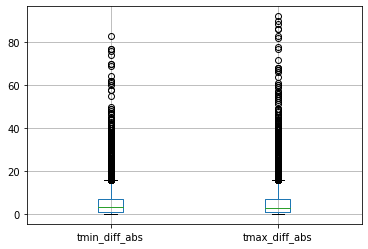

In [28]:
df_paired_10k.boxplot(column=['tmin_diff_abs', 'tmax_diff_abs'])

Clearly, there are some actual errors here. Not just outliers.

In [29]:
df_paired_10k.loc[(df_paired_10k.loc[:, 'tmin_diff_abs'].nlargest(20)).index,
                  ['circle_name', 'count_date', 'distance', 'min_temp', 'noaa_tmin_value', 'tmin_diff_abs']]

,circle_name,count_date,distance,min_temp,noaa_tmin_value,tmin_diff_abs
275895,Chincoteague N.W.R.,2003-12-28,4046.893371,30.0,113.00,83.00
144865,Malibu,2011-12-18,7076.027897,45.0,-32.08,77.08
142530,Santa Cruz Island,2007-12-17,9573.838063,22.0,-54.94,76.94
669904,Sisters,2001-12-16,3854.408652,22.0,98.06,76.06
261048,Crystal Springs,2007-12-15,7299.333140,42.0,-32.08,74.08
261028,Crystal Springs,2006-12-16,7299.333140,38.0,-32.08,70.08
9854,Kaua'i: Kapa'a,1973-12-31,9421.868369,0.0,69.98,69.98
342520,Ukiah,2001-12-15,8101.500452,32.0,100.94,68.94
285338,Calaveras,2008-01-05,9483.063229,32.0,-32.08,64.08
285332,Calaveras,2006-12-30,9483.063229,30.0,-32.08,62.08


Calculate z-scores:

In [30]:
df_paired_10k.loc[:, 'tmin_diff_z'] = stats.zscore(df_paired_10k.loc[:, 'tmin_diff_abs'], nan_policy='omit')
df_paired_10k.loc[:, 'tmax_diff_z'] = stats.zscore(df_paired_10k.loc[:, 'tmax_diff_abs'], nan_policy='omit')

/Users/rcdebaca/.pyenv/versions/funhacks371/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rcdebaca/.pyenv/versions/funhacks371/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Histogram of z-scores for tmin:

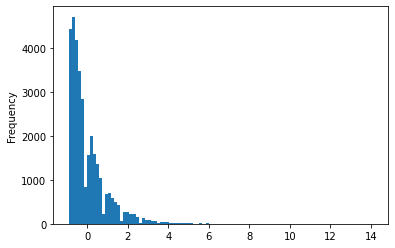

In [31]:
df_paired_10k.loc[:, 'tmin_diff_z'].plot.hist(bins=100)

Eliminate outliers (z > 2.96):

In [32]:
df_paired_noout = df_paired_10k.loc[((df_paired_10k.loc[:, 'tmin_diff_z'].abs() < 2.96) &
                                     (df_paired_10k.loc[:, 'tmax_diff_z'].abs() < 2.96))]

print('Rows in 10km temp-screened dataset:', df_paired_10k.index.size)
print('Rows in no outlier dataset:', df_paired_noout.index.size)

Rows in 10km temp-screened dataset: 369900
Rows in no outlier dataset: 32097


Show box & whisker plots again:

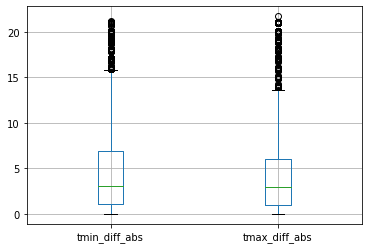

In [33]:
df_paired_noout.boxplot(column=['tmin_diff_abs', 'tmax_diff_abs'])

## Counting:

In [34]:
df_paired.loc[:, 'id'].value_counts()
station_list = df_paired.loc[:, 'id'].unique()
print('Number of unique NOAA stations:', len(station_list))

Number of unique NOAA stations: 23154


In [35]:
print('Total number of rows in the dataset:\n')
print('Original dataset:', df_paired.index.size)
print('Circle-to-NOAA distance under 10km:', df_paired_10k.index.size)
print('Outliers removed based on temperature:', df_paired_noout.index.size)

Total number of rows in the dataset:

Original dataset: 756378
Circle-to-NOAA distance under 10km: 369900
Outliers removed based on temperature: 32097


How many records have CBC data but not NOAA data?

In [36]:
print('tmin:', df_paired.loc[pd.isnull(df_paired.loc[:, 'min_temp']) &
                             pd.isna(df_paired.loc[:, 'noaa_tmin_value'])].index.size)
print('tmax:', df_paired.loc[pd.isnull(df_paired.loc[:, 'max_temp']) &
                             pd.isna(df_paired.loc[:, 'noaa_tmax_value'])].index.size)
print('precipitation:', df_paired.loc[(df_paired.loc[:, 'cbc_is_prec'] == True) &
                             (df_paired.loc[:, 'precipitation_value'] == 0)].index.size)

tmin: 7770
tmax: 7794
precipitation: 72795


How many states are included in the CBC counts?

In [37]:
print(df_paired['country_state'].unique())
print('Count:', len(df_paired['country_state'].unique()))
print('\n')
print('Value counts:\n', df_paired['country_state'].value_counts())

['US-HI' 'US-FL' 'US-TX' 'us-fl' 'US-LA' 'US-AL' 'US-MS' 'US-GA' 'US-AZ'
 'US-NM' 'US-SC' 'US-CA' 'US-AR' 'US-OK' 'US-NC' 'US-TN' 'US-NV' 'US-MO'
 'US-VA' 'US-KY' 'US-UT' 'US-KS' 'US-IL' 'US-CO' 'US-WV' 'US-IN' 'US-MD'
 'US-DE' 'US-OH' 'US-DC' 'US-NJ' 'US-PA' 'US-NE' 'US-NY' 'US-IA' 'US-CT'
 'US-WY' 'US-RI' 'US-MA' 'US-MI' 'US-ID' 'US-OR' 'us-ma' 'US-WI' 'US-SD'
 'us-wi' 'US-NH' 'US-VT' 'US-ME' 'US-MN' 'us-mn' 'US-MT' 'US-WA' 'US-ND'
 'US-AK']
Count: 55


Value counts:
 US-CO    50908
US-TX    48035
US-CA    47005
US-NY    33953
US-NC    30513
US-FL    30414
US-PA    29793
US-IL    29683
US-NJ    24401
US-NM    21704
US-OR    21542
US-OH    20180
US-MI    19056
US-WI    18828
US-WA    18549
US-MA    18105
US-MN    18085
US-IN    17278
US-VA    16733
US-AZ    16405
US-TN    15142
US-MD    14651
US-KS    12591
US-HI    10873
US-MO    10822
US-IA    10431
US-SC    10235
US-WY    10094
US-CT     9697
US-UT     8002
US-NH     7622
US-GA     7209
US-OK     6681
US-NE     6606
US-AR     6442


Histogram of years:

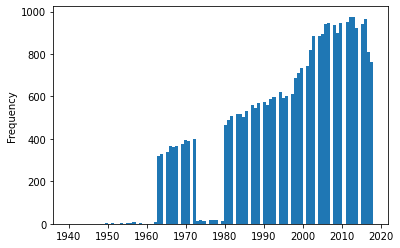

In [38]:
df_paired_noout.loc[:, 'count_year'].plot.hist(bins=100)

In [39]:
print('Furthest year back after screening:', df_paired_noout['count_year'].min())

Furthest year back after screening: 1940


Histogram of years before screening:

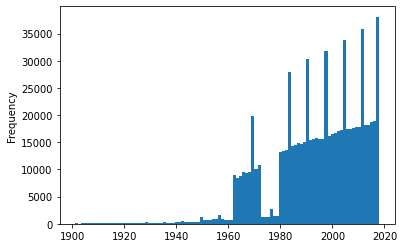

In [40]:
df_paired.loc[:, 'count_year'].plot.hist(bins=100)

Histogram of station distances:

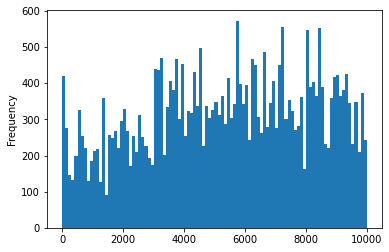

In [41]:
df_paired_noout.loc[:, 'distance'].plot.hist(bins=100)

Histogram of difference in elevations:

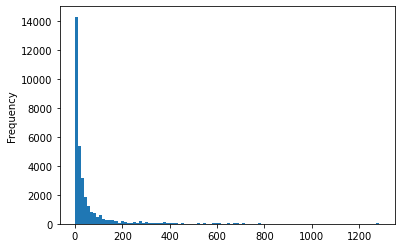

In [42]:
df_paired_noout.loc[:, 'elev_diff'].plot.hist(bins=100)

Scatter plot of station distance with mean temperature difference:

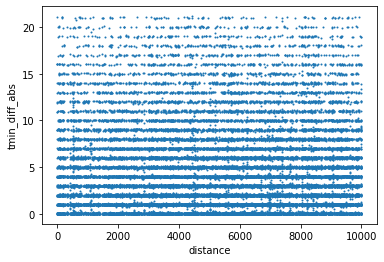

In [43]:
df_paired_noout.plot.scatter(x='distance',
                             y='tmin_diff_abs',
                             s=1)

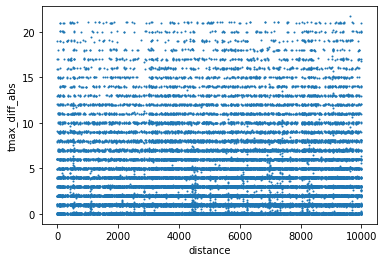

In [44]:
df_paired_noout.plot.scatter(x='distance',
                             y='tmax_diff_abs',
                             s=1)

### Best Matching Data

Smallest differences: (tmin)

In [45]:
df_paired_noout.loc[(df_paired_noout.loc[:, 'tmin_diff_abs'].nsmallest(20)).index,
                  ['circle_name', 'count_date', 'distance', 'elev_diff','min_temp', 'noaa_tmin_value', 'tmin_diff_abs']]

,circle_name,count_date,distance,elev_diff,min_temp,noaa_tmin_value,tmin_diff_abs
1218,Kaho'olawe,2012-12-20,3392.315957,38.46,68.0,68.0,0.0
1220,Kaho'olawe,2012-12-20,5328.165101,41.56,68.0,68.0,0.0
5405,O'ahu: Honolulu,1995-12-17,4310.685889,110.06,68.0,68.0,0.0
10878,Key West,2005-01-02,5604.824275,1.20,68.0,68.0,0.0
11383,Key Largo-Plantation Key,1966-12-28,7766.051936,2.10,68.0,68.0,0.0
11396,Key Largo-Plantation Key,1979-12-28,7766.051936,2.10,59.0,59.0,0.0
13664,Brownsville,1980-12-21,3707.029335,1.09,41.0,41.0,0.0
22061,Stuart,1967-12-21,3352.063452,1.92,68.0,68.0,0.0
26438,Laredo,2013-12-28,6165.047797,10.57,50.0,50.0,0.0
27620,Corpus Christi (Flour Bluff),1980-12-21,2961.359565,1.35,41.0,41.0,0.0


Smallest differences: (tmax)

In [46]:
df_paired_noout.loc[(df_paired_noout.loc[:, 'tmax_diff_abs'].nsmallest(20)).index,
                  ['circle_name', 'count_date', 'distance', 'elev_diff','max_temp', 'noaa_tmax_value', 'tmax_diff_abs']]

,circle_name,count_date,distance,elev_diff,max_temp,noaa_tmax_value,tmax_diff_abs
10878,Key West,2005-01-02,5604.824275,1.20,77.0,77.0,0.0
10879,Key West,2005-01-02,2175.233020,1.80,77.0,77.0,0.0
10965,Key West,2016-12-31,5604.824275,1.20,77.0,77.0,0.0
11574,Coot Bay-Everglades N.P.,2011-01-02,4414.729451,0.81,77.0,77.0,0.0
16319,Santa Ana N.W.R.,1988-12-17,7311.902063,3.85,68.0,68.0,0.0
16459,Santa Ana N.W.R.,2005-12-17,9314.250601,6.85,50.0,50.0,0.0
27920,Corpus Christi (Flour Bluff),1996-12-22,2961.359565,1.35,77.0,77.0,0.0
30601,Corpus Christi,1968-12-26,9009.093016,7.71,77.0,77.0,0.0
30988,Corpus Christi,2005-12-17,9734.104966,8.01,50.0,50.0,0.0
32702,Tampa,1997-01-04,9612.113654,4.07,77.0,77.0,0.0


How many rows contain temperature difference off less than 1 degree?

In [47]:
print('tmax:', df_paired_noout.loc[df_paired_noout['tmax_diff_abs'] < 1.0].index.size)
print('tmin:', df_paired_noout.loc[df_paired_noout['tmin_diff_abs'] < 1.0].index.size)
df_paired_noout_1deg = df_paired_noout.loc[df_paired_noout['tmax_diff_abs'] < 1.0]

tmax: 7326
tmin: 6420


For rows with less than 1 deg difference (tmax), look at the distribution of years. Increasing trend probably due to more volunteers over the years.

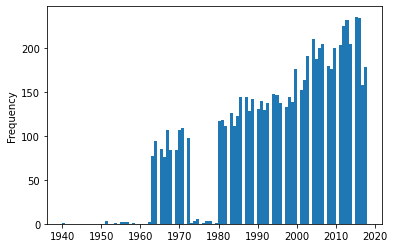

In [48]:
df_paired_noout_1deg.loc[:, 'count_year'].plot.hist(bins=100)

Look at distribution of latitudes:

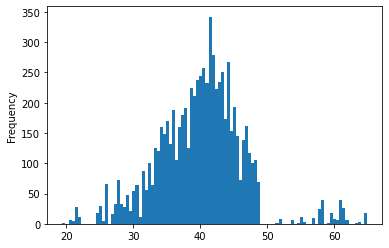

In [49]:
df_paired_noout_1deg.loc[:, 'lat'].plot.hist(bins=100)

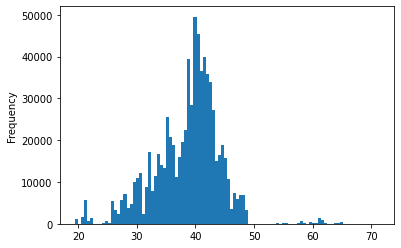

In [50]:
df_paired.loc[:, 'lat'].plot.hist(bins=100)

Distribution of longitudes:

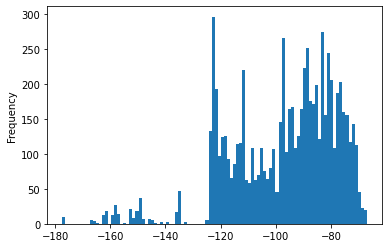

In [51]:
df_paired_noout_1deg.loc[df_paired_noout_1deg['lon'] < 0.0, 'lon'].plot.hist(bins=100)

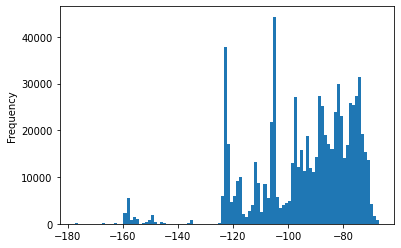

In [52]:
df_paired.loc[df_paired['lon'] < 0.0, 'lon'].plot.hist(bins=100)

For smallest temperature differences, look at distance distribution. Still a uniform distribution.

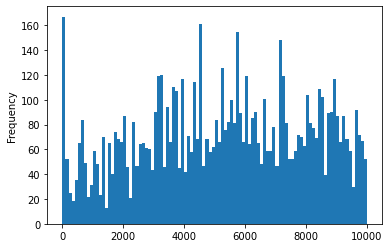

In [53]:
df_paired_noout_1deg.loc[:, 'distance'].plot.hist(bins=100)

For smallest temperature differences, look at elevation difference distribution.

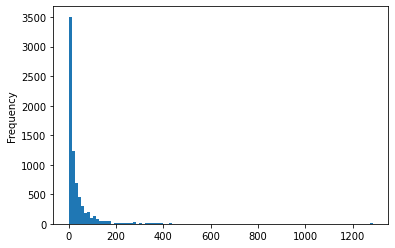

In [54]:
df_paired_noout_1deg.loc[:, 'elev_diff'].plot.hist(bins=100)

Less than 500 m elevation difference:

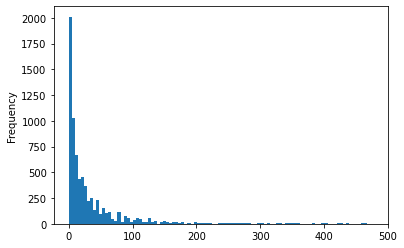

In [55]:
df_paired_noout_1deg.loc[df_paired_noout_1deg['elev_diff'] < 500.0, 'elev_diff'].plot.hist(bins=100)

Relationship between tmax difference and elevation change:

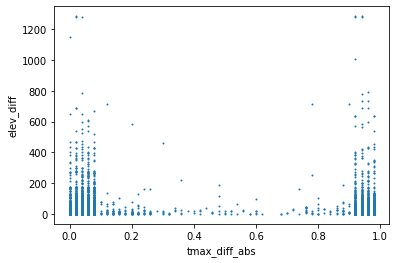

In [56]:
df_paired_noout_1deg.plot.scatter(x='tmax_diff_abs',
                                  y='elev_diff',
                                  s=1)

- I think we see this "step change" like splits because a lot of volunteers probably measured data using 

Relationship between tmax difference and distance:

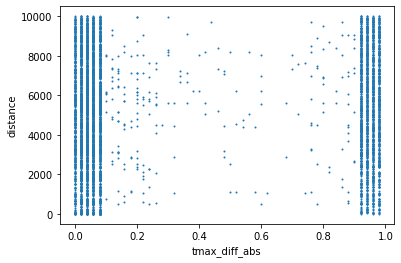

In [57]:
df_paired_noout_1deg.plot.scatter(x='tmax_diff_abs',
                                  y='distance',
                                  s=1)

Relationship between tmax difference and latitude:

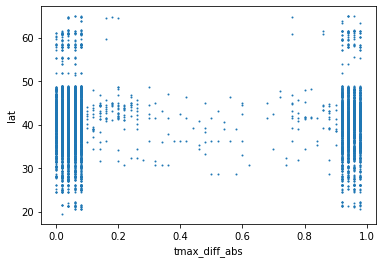

In [58]:
df_paired_noout_1deg.plot.scatter(x='tmax_diff_abs',
                                  y='lat',
                                  s=1)

In [59]:
df_paired['max_temp'].dtype

dtype('float64')